In [1]:
from surprise import KNNWithMeans, KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

import pandas as pd
import numpy as np

In [2]:
from surprise import KNNBaseline, KNNWithZScore

In [3]:
from surprise import trainset

In [4]:
#На Movielens-1m методы очень долго фитятся. П
#робую выбрать параметры для КНН на коротком датасете, потом применить на 1m

In [4]:
movies = pd.read_csv('../lecture-1/movies.csv')
ratings = pd.read_csv('../lecture-1/ratings.csv')

In [5]:
ratings.head()
#movies.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
len(ratings)

100836

In [8]:
print(len(ratings.userId.unique()), len(ratings.movieId.unique()))

610 9724


In [ ]:
#здесь юзеров сильно меньше чем фильмов

In [9]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
ratings[ratings.timestamp>1.456e+09].count()

userId       20437
movieId      20437
rating       20437
timestamp    20437
dtype: int64

In [ ]:
#перенес разделение на трейн тест выше. Со встроенным типом трэйн Сюрприз плохо работает с Гридсерчем

In [ ]:
#при разделении по дате оценки точность низкая

In [8]:
#train=ratings[ratings.timestamp<1.456e+09][['userId', 'movieId', 'rating']]
#test=ratings[ratings.timestamp>1.456e+09][['userId', 'movieId', 'rating']]

In [11]:
k=int(len(ratings)*0.85)

In [12]:
train=ratings[:k][['userId', 'movieId', 'rating']]
test=ratings[k:][['userId', 'movieId', 'rating']]

In [13]:
print(len(train), len(test))

85710 15126


In [4]:
#movies_with_ratings = movies.join(ratings.set_index('movieId'), on='movieId').reset_index(drop=True)
#movies_with_ratings.dropna(inplace=True)

In [10]:
#movies_with_ratings[movies_with_ratings.userId == 2.0].title.head().unique()

In [ ]:
#Заменил в примере с занятие название фильма на ай-ди

In [14]:
dataset = pd.DataFrame({
    '1uid': train.userId,
    '2iid': train.movieId,
    '3rating': train.rating
})

In [15]:
dataset.columns=[['uid', 'iid', 'rating']]

In [16]:
dataset.uid=dataset.uid.astype(int)

In [17]:
train.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85710 entries, 0 to 85709
Data columns (total 3 columns):
userId     85710 non-null int64
movieId    85710 non-null int64
rating     85710 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


In [19]:
ratings.rating.min()

0.5

In [20]:
ratings.rating.max()

5.0

In [21]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train, reader)

In [22]:
trainset, testset = train_test_split(data, test_size=.2)

In [195]:
#train_data = Dataset.load_from_df(trainset, reader = reader)

#trainset = data.build_full_trainset()

In [ ]:
#Из КНН алгоритмов лучше всего по точности был KNNWithMeans

In [23]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
#algo = KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
#algo = KNNBaseline(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
#algo = KNNWithZScore(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
#KNNBaseline, KNNWithZScore
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [67]:
#test.rating.values#head()

In [221]:
#test_pred = algo.test(testset)

In [24]:
#uid = str(15)  # raw user id (as in the ratings file). They are **strings**!
#iid = str(1)  # raw item id (as in the ratings file). They are **strings**!
just_pred=[]
for i in range(len(test)):
    #print(test.iloc[i][2])
    #print(tuple(algo.predict(test.iloc[i][0], test.iloc[i][1], test.iloc[i][2]))[3])
    just_pred.append(tuple(algo.predict(test.iloc[i][0], test.iloc[i][1], test.iloc[i][2]))[3])
# get a prediction for specific users and items.
#pred = algo.predict(15, 296, verbose=True)
#pred = algo.predict(uid, iid, r_ui=2.5, verbose=True)

In [25]:
def rmse(pred, true_vals):
    mse=0
    for i in zip(pred, true_vals):
        #print(i, (i[0]-i[1])**2)
        mse+=(i[0]-i[1])**2
    return (np.sqrt(mse/len(test)))

In [26]:
rmse(just_pred, test.rating.values)

1.0521340188780866

In [29]:
#test_pred = algo.test(test)
test_pred = algo.test(testset)

In [30]:
#for i in zip(test_pred, )
#testset
just_pred=[]
for i in test_pred:
    just_pred.append(i[3])

In [31]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 0.9026


0.9025776988794207

In [ ]:
#ошибка сильно выше чем на занятии. 

In [32]:
from surprise.model_selection import GridSearchCV

In [35]:
param_grid = {'k': [90, 150, 210],
              'sim_options': {'name': ['pearson_baseline', 'cosine', 'msd'],
                              #'min_support': [0.5, 5],
                              'user_based': [True, False]}
              }

In [74]:
#train_data = Dataset.load_from_df(trainset, \
                                      #[['user', 'movie', 'rating']]\
                                       #reader = reader)

#train_data = Dataset.load_from_df(dataset, reader = reader)

In [36]:
#здесь дата для обучения - все еще трэйн
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)
#gs.fit(train_data)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity ma

In [38]:
#gs.predict(15, 296)
#grid search и эксперимент с маленьким датасетом дал только понимание, что соседей должно быть больше 100

In [ ]:
# увеличенный датасет

In [37]:
movies = pd.read_table('../ml-1m/movies.dat', sep="::", names=['movieId', 'title', 'genre'])
ratings = pd.read_table('../ml-1m/ratings.dat', sep="::", names=['userId', 'movieId', 'rating', 'timestamp'])

/home/zamarseny/anaconda3/envs/recsys/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/zamarseny/anaconda3/envs/recsys/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [38]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
print(len(ratings.userId.unique()), len(ratings.movieId.unique()))

6040 3706


In [ ]:
#пользователей больше чем объектов. Значит, должна лучше работать фильтрация по похожим фильмам

In [40]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [50]:
trainset, testset = train_test_split(data, test_size=.1)

In [49]:
#здесь дата для обучения - весь датасет. Потом отдельно запущу обучение на трэйне
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)
#gs.fit(train_data)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity ma

In [105]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [106]:
results_df=results_df[['param_k', 'mean_test_rmse', 'param_sim_options', 'params']]

In [107]:
results_df['user_based']=results_df.param_sim_options.apply(lambda x: x.get('user_based'))

In [108]:
results_df['metric_similarity']=results_df.param_sim_options.apply(lambda x: x.get('name'))

In [109]:
results_df.sort_values(by='mean_test_rmse')

,param_k,mean_test_rmse,param_sim_options,params,user_based,metric_similarity
1,90,0.870769,"{'name': 'pearson_baseline', 'user_based': False}","{'k': 90, 'sim_options': {'name': 'pearson_bas...",False,pearson_baseline
7,150,0.872394,"{'name': 'pearson_baseline', 'user_based': False}","{'k': 150, 'sim_options': {'name': 'pearson_ba...",False,pearson_baseline
13,210,0.872950,"{'name': 'pearson_baseline', 'user_based': False}","{'k': 210, 'sim_options': {'name': 'pearson_ba...",False,pearson_baseline
5,90,0.891960,"{'name': 'msd', 'user_based': False}","{'k': 90, 'sim_options': {'name': 'msd', 'user...",False,msd
11,150,0.895096,"{'name': 'msd', 'user_based': False}","{'k': 150, 'sim_options': {'name': 'msd', 'use...",False,msd
17,210,0.897431,"{'name': 'msd', 'user_based': False}","{'k': 210, 'sim_options': {'name': 'msd', 'use...",False,msd
0,90,0.897556,"{'name': 'pearson_baseline', 'user_based': True}","{'k': 90, 'sim_options': {'name': 'pearson_bas...",True,pearson_baseline
6,150,0.898994,"{'name': 'pearson_baseline', 'user_based': True}","{'k': 150, 'sim_options': {'name': 'pearson_ba...",True,pearson_baseline
3,90,0.899208,"{'name': 'cosine', 'user_based': False}","{'k': 90, 'sim_options': {'name': 'cosine', 'u...",False,cosine
12,210,0.899987,"{'name': 'pearson_baseline', 'user_based': True}","{'k': 210, 'sim_options': {'name': 'pearson_ba...",True,pearson_baseline


In [269]:
results_df['metric_encoded']=0
results_df.loc[ (results_df.metric_similarity=='cosine'), 'metric_encoded'] = 1
results_df.loc[ (results_df.metric_similarity=='pearson_baseline'), 'metric_encoded'] = -1
#results_df

In [102]:
results_df.groupby('user_based')['mean_test_rmse'].mean()

user_based
False    0.884988
True     0.918787
Name: mean_test_rmse, dtype: float64

In [ ]:
#теория что сравнение фильмов лучше чем сравнение пользователей здесь лучше - подтвердилась

In [103]:
results_df.groupby('metric_similarity')['mean_test_rmse'].mean()

metric_similarity
cosine              0.916226
msd                 0.925562
pearson_baseline    0.884162
Name: mean_test_rmse, dtype: float64

In [110]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [204]:
plt.rcParams["figure.figsize"] = (20,10)

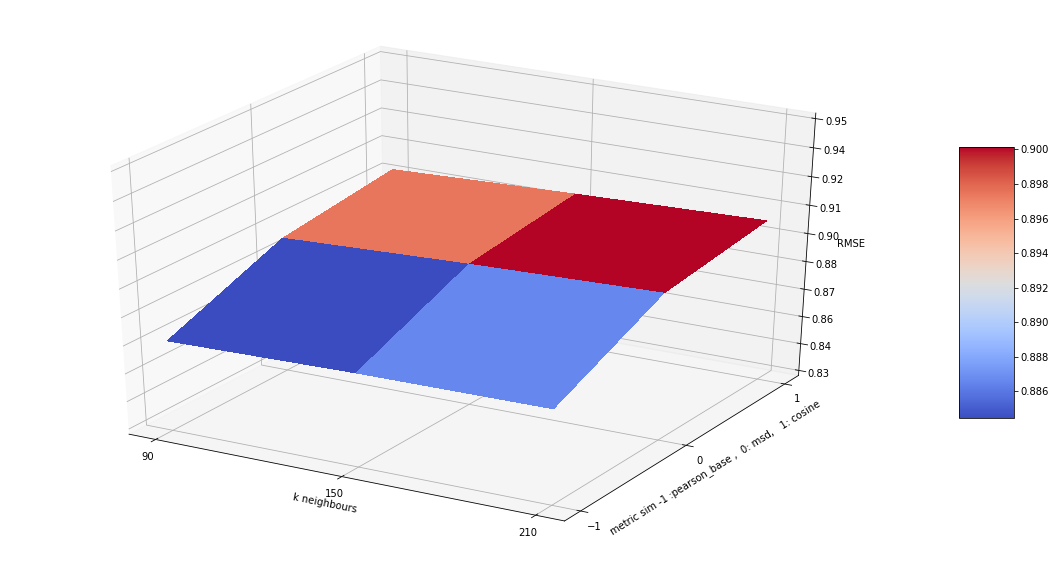

In [285]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = [90, 150, 210]#results_df.param_k#np.arange(-5, 5, 0.25)
Y = ['cosine', 'msd', 'pearson_baseline']#results_df.metric_similarity#np.arange(-5, 5, 0.25)
Y1= [1,0,-1]
X, Y1 = np.meshgrid(X, Y1)
#Z=np.zeros((3,3))

for i in range(3):
    for j in range(3):
        #Z[i][j]=X[i][j]
        Z[i][j] = float(results_df[(results_df.user_based==False) & (results_df.param_k==X[i][j]) & \
                          (results_df.metric_similarity==Y[i])]['mean_test_rmse'].values)#np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y1, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.axes.set_xticks(X[0])
ax.axes.set_yticks(Y1[:, 0])

# Customize the z axis.
ax.set_zlim(.83, 0.95)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('k neighbours')
ax.set_ylabel('metric sim -1 :pearson_base ,  0: msd,   1: cosine')
ax.set_zlabel('RMSE')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.figure(figsize=(20,10))


plt.show()


In [ ]:
#не очень наглядно. Если бы быстрее считалось - можно было бы сделать более плотную сетку. 
Можно попробовать точечную диаграмму с цветом соответствующим высоте точки

In [290]:
import matplotlib
import matplotlib.cm as cm

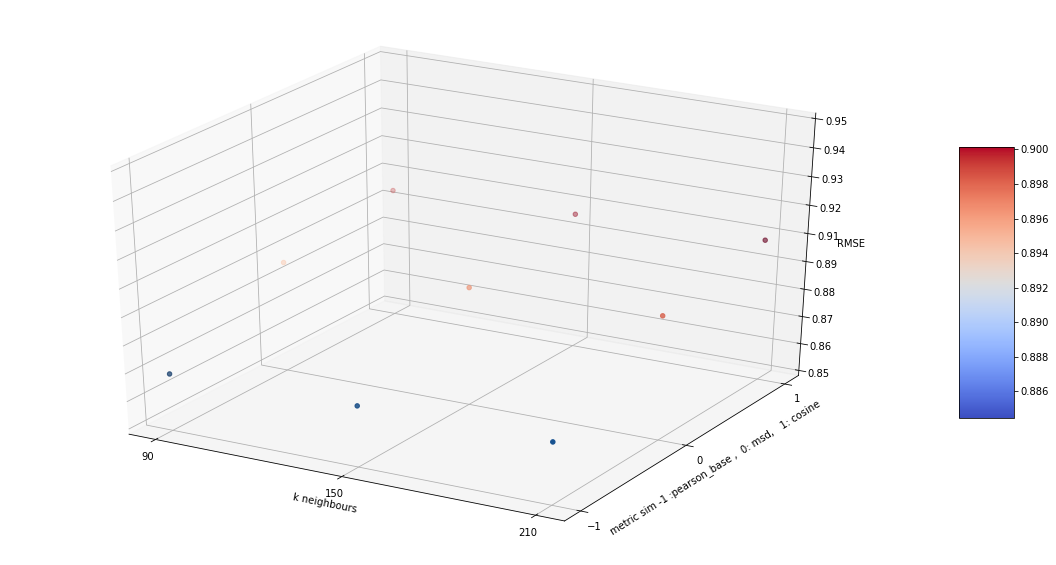

In [292]:
fig = plt.figure()
ax = fig.gca(projection='3d')

xx=results_df[results_df.user_based==False]['param_k']
yy=results_df[results_df.user_based==False]['metric_encoded']
zz=results_df[results_df.user_based==False]['mean_test_rmse']

#подбираем цвет для величины ошибки


minima = min(zz)
maxima = max(zz)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdBu_r)


#построение точечной диаграммы
ax.scatter(xx, yy, zz, \
               #c='b'\
               c=mapper.to_rgba(zz)
               , marker='o'\
          )

ax.axes.set_xticks(X[0])
ax.axes.set_yticks(Y1[:, 0])

# Customize the z axis.
ax.set_zlim(.85, 0.95)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('k neighbours')
ax.set_ylabel('metric sim -1 :pearson_base ,  0: msd,   1: cosine')
ax.set_zlabel('RMSE')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

In [ ]:
#синие точки - меньше ошибка, красные - больше
#от количества соседей зависимости не наблюдается (для выбранного диапазона)

In [51]:
#algoIt = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algoGS = KNNWithMeans(k=90, sim_options={'name': 'pearson_baseline', 'user_based': False})
algoGS.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [52]:
test_pred_GS = algoGS.test(testset)

In [53]:
accuracy.rmse(test_pred_GS, verbose=True)

RMSE: 0.8557


0.8556873504851745

In [ ]:
#c выбранными параметрами на тесте ошиббка получилась меньше, чем на валидации
#конец решения